In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 3.4 Further solution concepts for normal-form games

The two solution concepts so far have been Pareto optimality and Nash equilibrium. Some other ideas are introduced here.

### 3.4.1 Maxmin and minmax strategies

The maxmin strategy is the best an agent can do (max), given the other agents all make decisions to reduce the agents utility (min). This is then a lower bound on the value an agent can get in a game. As an example, consider this game:

$
\begin{array}{c|cc}
\text{} & \text{A} & \text{B} \\
\hline
\text{A} & 3,3 & 2,2 \\
\text{B} & 0,0 & 1,1 \\
\end{array}
$

Agent 2 wants to minimise the return of agent 1, so it's easy to see they need to always go B. Agent 1's minmax strategy is then to go A always, and their maxmin value is 2.

In the battle of the sexes we can see a more complicated case:

$
\begin{array}{c|cc}
\text{} & \text{A} & \text{B} \\
\hline
\text{A} & 2,1 & 0,0 \\
\text{B} & 0,0 & 1,2 \\
\end{array}
$

If agent 2 goes A with probability $p$, then the return for agent 1 going A with probability $\hat{p}$ is:

$$2p\hat{p}+0(1-p)\hat{p}+0p(1-\hat{p})+1(1-p)(1-\hat{p})$$

This can be simplified to:

$$(3p-1)\hat{p}-p+1$$

If $3p-1\geq 0$, the maximum score for agent 1 means setting $\hat{p}=1$, which gives $(3p-1)-p+1=2p$. Agent 2 minimises this by setting $p=\frac{1}{3}$ (lowest they can if $3p-1\geq 0$).

If instead $3p-1\leq 0$, the maximum score for agent 1 means setting $\hat{p}=0$, which gives $-p+1$. Agent 2 minimises this by setting $p=\frac{1}{3}$ (highest they can if $3p-1\leq 0$).

If $p=\frac{1}{3}$ then the score for agent 1 is $\frac{2}{3}$. This is then their maxmin.

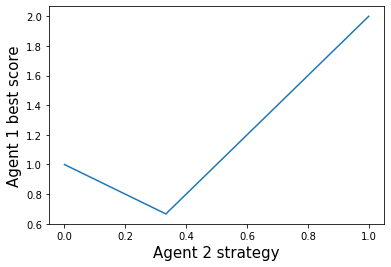

In [8]:
agent_1_options = np.linspace(0,1,100)
agent_2_options = np.linspace(0,1,100)
agent_1_minmax = []

for opt2 in agent_2_options:
    agent_1_opt2_scores = 2*agent_1_options*opt2+1*(1-agent_1_options)*(1-opt2)
    agent_1_minmax.append(np.max(agent_1_opt2_scores))

plt.plot(agent_2_options,agent_1_minmax)
plt.ylabel("Agent 1 best score",fontsize=15)
plt.xlabel("Agent 2 strategy",fontsize=15)
plt.show()

Minmax means the above, but from the perspective of the other agent. A strategy is minmax if it minimises the other agents score, given they take the best action they can. This can be generalised to multiple agents too.

**Theorem:** In a 2 player zero-sum game at any nash equilibrium each player receives a value equal to their minmax and maxmin values.